# Определение перспективного тарифа для телеком компании

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание данных
#### Таблица users (информация о пользователях):  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы) 
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана 
#### Таблица calls (информация о звонках):  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок   
Таблица messages (информация о сообщениях):  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение    
#### Таблица internet (информация об интернет-сессиях):  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  <br>
#### Таблица tariffs (информация о тарифах):  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### План выполнения проекта: 
1. Изучение исходных файлов;  
2. Подготовка данных:  
    - приведение данных к нужным типам;  
    - исправление ошибок в данных;
    - добавление необходимых столбцов;  
3. Анализ данных (расчет основных показателей поведения абонентов оператора);  
4. Проверка гипотез;  
5. Общий вывод.  

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Подгрузим данные.

In [2]:
#calls = pd.read_csv('calls.csv')
#internet = pd.read_csv('internet.csv')
#tariffs = pd.read_csv('tariffs.csv')
#messages = pd.read_csv('messages.csv')
#users = pd.read_csv('users.csv')

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [4]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Вывод
Мы загрузили данные по тарифам сотового оператора, а также абонентам и их использованию услуг: звонков, сообщений, интернета.   
Мы обнаружили пропуски данных в churn_date - это объясняется тем, что данный параметр появляется только у абонентов, которые покинули компанию.  
Необходимо изменить тип данных у показателей call_date, session_date, message_date, churn_date, reg_date на тип datetime. А тип данных у показателя id на Int.  
Длительность минут не целая, необходимо округлить, так как у оператора поминутная тарификация. 

### Шаг 2. Подготовим данные. 

Изменим тип данных тип данных у показателей call_date, session_date, message_date, churn_date, reg_date на тип datetime.

calls['call_date'] = calls['call_date'].astype('datetime64[ns]')
internet['session_date'] = internet['session_date'].astype('datetime64[ns]')
messages['message_date'] = messages['message_date'].astype('datetime64[ns]')
users['churn_date'] = users['churn_date'].astype('datetime64[ns]')
users['reg_date'] = users['reg_date'].astype('datetime64[ns]')

Изменим тип данных у показателей id на int.

In [15]:
calls['id'] = calls['id'].astype(int)
internet['id'] = internet['id'].astype(int)
messages['id'] = messages['id'].astype(int)

Округлим длительность минут.

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

In [17]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


Длительность некоторых звонков 0 минут. Возможно, это пропущенные звонки.  Думаю, что не нужно их удалять. Тем более все эти цифры нам понадобятся далее для расчета использованных минут сверх тарифа по каждому пользователю для расчета доходов.

Округлим трафик интернета в большую сторону. 

In [18]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)

In [19]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,113,2018-11-25,1000
1,1,10001,1053,2018-09-07,1000
2,2,10002,1198,2018-06-25,1000
3,3,10003,551,2018-08-22,1000
4,4,10004,303,2018-09-24,1000


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [20]:
calls['month'] = calls['call_date'].dt.month

In [21]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12


In [22]:
users_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns = {'duration': 'calls_duration', 'id': 'calls_total'})

In [23]:
users_calls.head()

,user_id,month,calls_duration,calls_total
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Посчитаем количество отправленных сообщений по месяцам.

In [24]:
messages['month'] = messages['message_date'].dt.month

In [25]:
users_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns = {'id': 'total_messages'})

In [26]:
users_messages.head()

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посчитаем объем израсходованного интернет-трафика по месяцам.

In [27]:
internet['month'] = internet['session_date'].dt.month

In [28]:
users_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns = {'mb_used': 'total_internet'})

In [29]:
users_internet.head()

,user_id,month,total_internet
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Посчитаем помесячную выручку с каждого пользователя. 

Сделаем одну общую таблицу со всеми показателями. 

In [30]:
cons_data = users_calls.merge(users_messages, on=['user_id', 'month'], how='outer')

In [31]:
cons_data.head()

,user_id,month,calls_duration,calls_total,total_messages
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0


In [32]:
cons_data = cons_data.merge(users_internet, on=['user_id', 'month'], how='outer')

In [33]:
cons_data.head()

,user_id,month,calls_duration,calls_total,total_messages,total_internet
0,1000,5,159.0,22.0,22.0,2256.0
1,1000,6,172.0,43.0,60.0,23257.0
2,1000,7,340.0,47.0,75.0,14016.0
3,1000,8,408.0,52.0,81.0,14070.0
4,1000,9,466.0,58.0,57.0,14581.0


In [34]:
cons_data = cons_data.merge(users, on=['user_id'], how='left')

In [35]:
cons_data.head()

,user_id,month,calls_duration,calls_total,total_messages,total_internet,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [36]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [37]:
cons_data = cons_data.merge(tariffs, on=['tariff'], how='left')

In [38]:
cons_data.head()

,user_id,month,calls_duration,calls_total,total_messages,total_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [39]:
cons_data.isna().sum()

user_id                     0
month                       0
calls_duration             40
calls_total                40
total_messages            497
total_internet             11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

У некоторых пользователей отсутствуют показатели: продолжительность звонков, кол-во звонков, кол-во сообщений, интернет. Возможно, это связано с тем, что они этими услугами не пользуются. Заменим пропуски на 0, чтобы они не мешали дальнейшим вычислениям. 

In [40]:
cons_data['calls_duration'] = cons_data['calls_duration'].fillna(0)
cons_data['calls_total'] = cons_data['calls_total'].fillna(0)
cons_data['total_messages'] = cons_data['total_messages'].fillna(0)
cons_data['total_internet'] = cons_data['total_internet'].fillna(0)


In [41]:
cons_data.isna().sum()

user_id                     0
month                       0
calls_duration              0
calls_total                 0
total_messages              0
total_internet              0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Проверим данные на наличие дублей.

In [42]:
cons_data.duplicated().sum()

0

Добавим функцию для расчета расходов абонента сверх лимита и выведем эти расходы в отдельный столбец.

In [43]:
def above_the_tariff(row):
    sms = (row['total_messages'] - row['messages_included']) * row['rub_per_message']
    mins = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['total_internet'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total


In [44]:
cons_data['above_the_tariff'] = cons_data.apply(lambda x: above_the_tariff(x), axis=1)


Добавим столбец Общая выручка, который включает в себя абонентскую плату и расходы выше лимитов, включенных в трафик. 

In [45]:
cons_data['total_paid'] = cons_data['rub_monthly_fee'] + cons_data['above_the_tariff']


In [46]:
cons_data.head()

,user_id,month,calls_duration,calls_total,total_messages,total_internet,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


### Шаг 3. Проанализируем данные

Опишем поведение клиентов оператора, исходя из выборки. 

Посчитаем, сколько минут разговора требуется пользователям каждого тарифа в месяц.

In [47]:
cons_data.groupby('tariff').agg({'calls_duration':['median', 'mean', 'var', 'std']})

calls_duration                                       
               median        mean            var         std
tariff                                                      
smart           422.0  417.934948   36219.315784  190.313730
ultra           518.0  526.623350  100873.633397  317.606098

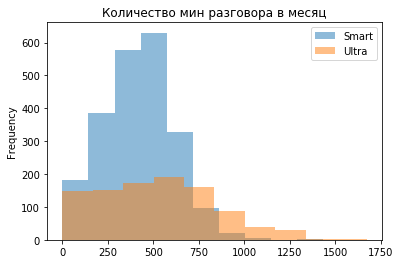

In [48]:
cons_data[cons_data['tariff']=='smart']['calls_duration'].plot(kind='hist', bins=10, alpha=0.5, label='Smart', title = 'Количество мин разговора в месяц')
cons_data[cons_data['tariff']=='ultra']['calls_duration'].plot(kind='hist', bins=10, alpha=0.5, label = 'Ultra')
plt.legend()


На тарифе Smart абоненты говорят в среднем 420 мин, на тарифе Ultra - 520 мин (странно, что абоненты выбирают тариф с большой абонентской платой при этом).   
Абоненты тарифа Smart выходят за пределы включенного трафика, абоненты Ultra - нет.  
На обоих тарифах среднее примерно равна медиане, это говорит об отсутствии аномального трафика.   
Стандартные отклонения на двух тарифах сильно различаются. Это связано с тем, что разброс кол-ва использованных минут у абонентов Ultra выше, чем у Smart.

Посчитаем, сколько сообщений требуется пользователям каждого тарифа в месяц.

In [49]:
cons_data.groupby('tariff').agg({'total_messages':['median', 'mean', 'var', 'std']})

total_messages                                   
               median       mean          var        std
tariff                                                  
smart            28.0  33.384029   796.812958  28.227876
ultra            38.0  49.363452  2285.266143  47.804457

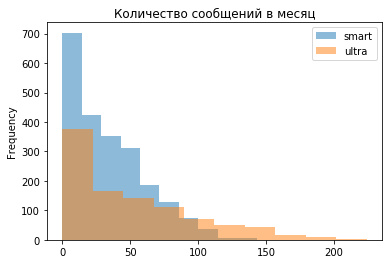

In [50]:
cons_data[cons_data['tariff']=='smart']['total_messages'].plot(kind='hist', bins=10, alpha = 0.5, label = 'smart', title='Количество сообщений в месяц')
cons_data[cons_data['tariff']=='ultra']['total_messages'].plot(kind='hist', bins=10, alpha = 0.5, label = 'ultra')
plt.legend()

Абоненты на обоих тарифах чаще всего отправляют около 25 сообщений в мес. При этом разброс кол-ва сообщений у пользователей в тарифе Ultra больше.   
Пользователи обоих тарифов пользуются сообщениями очень мало (около 1 в день). 

Посчитаем, сколько интернет трафика требуется пользователям каждого тарифа в месяц.

In [51]:
cons_data.groupby('tariff').agg({'total_internet':['median', 'mean', 'var', 'std']})

total_internet                                          
               median          mean           var           std
tariff                                                         
smart         16531.0  16229.188425  3.454591e+07   5877.576978
ultra         19324.0  19486.901523  1.019356e+08  10096.317202

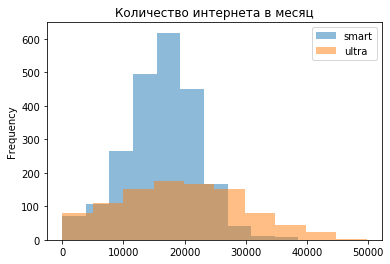

In [52]:
cons_data[cons_data['tariff']=='smart']['total_internet'].plot(kind='hist', bins=10, label = 'smart', alpha=0.5, title='Количество интернета в месяц')
cons_data[cons_data['tariff']=='ultra']['total_internet'].plot(kind='hist', bins=10, label = 'ultra', alpha=0.5)
plt.legend()

Абоненты тарифного плана Smart используют около 17 Mb интернета в месяц, абоненты Ultra - около 19 Mb. При этом у обоих тарифах среднее равно медиане, что говорит об отсутствии большого разброса.   
Абоненты Smart чаще выходят за пределы лимита интернет трафика, чем абоненты Ultra.

Расчитаем для каждого тарифа среднюю выручку абонентов в месяц.

In [53]:
cons_data.groupby('tariff').agg({'total_paid':['median', 'mean', 'var', 'std']})

total_paid                                        
           median         mean            var         std
tariff                                                   
smart       960.0  1233.641095  620699.733786  787.844994
ultra      1950.0  2060.598985  127060.630690  356.455650

Тариф Ultra приносит компании в 2 раза больше денег, чем тариф Smart.

Посмотрим на распределение средней выручки по обоим тарифам помесячно. 

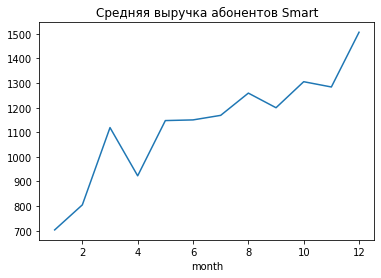

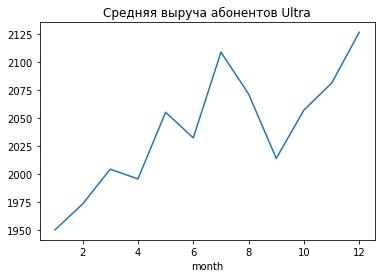

In [54]:
cons_data[cons_data['tariff']=='smart'].groupby('month').agg({'total_paid': 'mean'}).plot(legend=False, title='Средняя выручка абонентов Smart')
cons_data[cons_data['tariff']=='ultra'].groupby('month').agg({'total_paid': 'mean'}).plot(legend=False, title='Средняя выруча абонентов Ultra')

Тренды распределения средней выручки по месяцам в целом схожи в обоих тарифах. В январе - минимальная выручка (связанная с длительными новогодними праздниками), в декабре - максимальная. 

Посмотрим суммарную помесячную выручку абонентов по обоим тарифных планов. 

Text(0.5, 1.0, 'Суммарная выручка абонентов по месяцам')

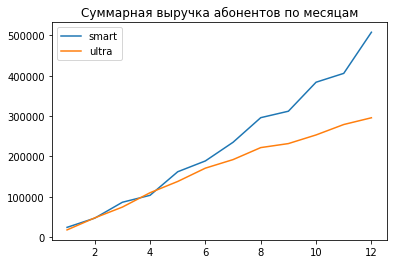

In [55]:
plt.plot(cons_data[cons_data['tariff']=='smart'].groupby('month').agg({'total_paid': 'sum'}), label='smart')
plt.plot(cons_data[cons_data['tariff']=='ultra'].groupby('month').agg({'total_paid': 'sum'}), label='ultra')
plt.legend()
plt.title('Суммарная выручка абонентов по месяцам')

Несмотря на то, что средняя выручка одного абонента Ultra выше, чем у абонентам Smart, в выборке 500 абонентов наибольший доходы компании приносят абоненты Smart, так как их количество больше, чем абонентов Ultra.

### Шаг 4. Проверим гипотезы. 

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;  
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Для данной задачи будем использовать Гипотезу о равенстве средних двух генеральных совокупностей. 

Сформулируем гипотезы №1:  
    H0 - выручка тарифов "Ультра" и "Смарт" не различается;  
    H1 - выручка тарифов "Ультра" и "Смарт" различается. 

In [56]:
ultra = cons_data[cons_data['tariff']=='ultra']['total_paid']
smart = cons_data[cons_data['tariff']=='smart']['total_paid']

In [57]:
alpha = 0.05

In [58]:
results = st.ttest_ind(ultra, smart)

In [59]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.6982644464974923e-190
Отвергаем нулевую гипотезу


Этого и следовало ожидать, так как разница в одной лишь абонентской плате у двух тарифов существенная. 

Сформулируем гипотезы №2:  
    H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;  
    H1 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [60]:
moscow = cons_data[cons_data['city']=='Москва']['total_paid']
other_cities = cons_data[cons_data['city']!='Москва']['total_paid']

In [61]:
alpha = 0.05

In [62]:
results = st.ttest_ind(moscow, other_cities)

In [63]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4748527079597812
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью в почти 47% такой результат можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии.


### Общий вывод.

В данном проекте мы провели анализ тарифов Смарт и Ультра федерального оператора связи на выборке клиентов. В нашей выборке было 500 абонентов. Мы проанализировали поведение клиентов и попытались сделать вывод, какой тариф лучше (приносит больше денег).   
Мы обнаружили пропуски данных в churn_date - это объясняется тем, что данный параметр появляется только у абонентов, которые покинули компанию.  
Мы изменили тип данных у показателей call_date, session_date, message_date, churn_date, reg_date на тип datetime. А тип данных у показателя id на Int.    
Также округлили продолжительность минут, так как у оператора поминутная тарификация.  
Также мы посчитали для каждого пользователя кол-во звонков и минут разговора по месяцам (на тарифе Smart абоненты говорят в среднем 420 мин, на тарифе Ultra - 520 мин) ; кол-во отправленных сообщений (пользователи обоих тарифов пользуются сообщениями очень мало (около 30 в месяц)) и объем интернет-трафика в месяц (абоненты тарифного плана Smart используют около 17 Mb интернета в месяц, абоненты Ultra - около 19 Mb); посчитали помесячную выручку с каждого пользователя. 

Также мы описали поведение клиентов исходя из выборки. Абоненты тарифа Smart выходят за пределы включенного трафика, абоненты Ultra - нет. На обоих тарифах среднее примерно равна медиане, это говорит об отсутствии аномального трафика.   
Абоненты Smart чаще выходят за пределы лимита интернет трафика, чем абоненты Ultra.  
Тренды распределения средней выручки по месяцам в целом схожи в обоих тарифах. В январе - минимальная выручка (связанная с длительными новогодними праздниками), в декабре - максимальная.  
Тариф Ultra приносит компании в 2 раза больше денег, чем тариф Smart (2060 руб. vs 1233 руб.).    
Несмотря на то, что средняя выручка одного абонента Ultra выше, чем у абонентам Smart, в выборке 500 абонентов наибольший доходы компании приносят абоненты Smart, так как их количество больше, чем абонентов Ultra.

Мы проверили гипотезы:  
1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Данная гипотеза подтвердилась. Этого и следовало ожидать, так как разница в одной лишь абонентской плате у двух тарифов существенная.  
2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Данная гипотеза не подтвердилась. 
